# Sentiment Analysis

In [1]:
# Required modules

import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 7)

In [19]:
# Loading the data

data = pd.read_csv('hashtag_data.csv')
data.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1262787913311387649,1262787913311387649,1589907074000,2020-05-19,16:51:14,UTC,1250079805980045318,dramaflick,The Drama Flick,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '1250079805980045318', 'username'...",NaN,NaN,NaN,NaN
1,1262787786152620040,1262787786152620040,1589907044000,2020-05-19,16:50:44,UTC,807843238648299520,knowpuneet,TravelTrainee,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '807843238648299520', 'username':...",NaN,NaN,NaN,NaN
2,1262787219498000384,1262787219498000384,1589906909000,2020-05-19,16:48:29,UTC,1085426639570235392,narasinhpurohit,Narasinh Purohit,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '1085426639570235392', 'username'...",NaN,NaN,NaN,NaN
3,1262786998592434176,1262786998592434176,1589906856000,2020-05-19,16:47:36,UTC,1104213868467806208,ka_trolls,Humans Of Hindutva,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '1104213868467806208', 'username'...",NaN,NaN,NaN,NaN
4,1262786970163441669,1262786970163441669,1589906849000,2020-05-19,16:47:29,UTC,392180204,rajendrabohora,rajendrabohora,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '392180204', 'username': 'rajendr...",NaN,NaN,NaN,NaN


In [3]:
# Inspecting the data

data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124384 entries, 0 to 124383
Data columns (total 34 columns):
id                 124384 non-null int64
conversation_id    124384 non-null int64
created_at         124384 non-null int64
date               124384 non-null object
time               124384 non-null object
timezone           124384 non-null object
user_id            124384 non-null int64
username           124384 non-null object
name               124384 non-null object
place              9143 non-null object
tweet              124384 non-null object
mentions           124384 non-null object
urls               124384 non-null object
photos             124384 non-null object
replies_count      124384 non-null int64
retweets_count     124384 non-null int64
likes_count        124384 non-null int64
hashtags           124384 non-null object
cashtags           124384 non-null object
link               124384 non-null object
retweet            124384 non-null bool
quote_url         

,id,conversation_id,created_at,user_id,replies_count,retweets_count,likes_count,video,near,geo,source,user_rt_id,user_rt,retweet_id,retweet_date,translate,trans_src,trans_dest
count,1.243840e+05,1.243840e+05,1.243840e+05,1.243840e+05,124384.000000,124384.000000,124384.000000,124384.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,1.248684e+18,1.248494e+18,1.586544e+12,4.351165e+17,0.667626,2.077044,7.881858,0.061953,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,2.229079e+16,2.304835e+16,5.369331e+09,5.240636e+17,11.845734,28.424693,121.299772,0.241072,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,8.660923e+08,8.660923e+08,1.216819e+12,3.160000e+03,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,1.243007e+18,1.242870e+18,1.585191e+12,2.617597e+08,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,1.247014e+18,1.246851e+18,1.586146e+12,2.940158e+09,0.000000,0.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.256459e+18,1.256427e+18,1.588398e+12,9.912536e+17,0.000000,0.000000,2.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,1.263035e+18,1.263035e+18,1.589966e+12,1.262808e+18,2044.000000,3710.000000,19929.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


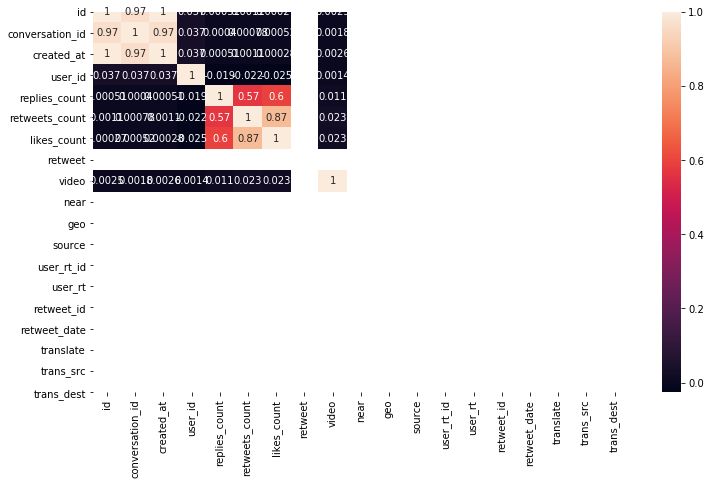

In [4]:
# Correlation matrix

sns.heatmap(data.corr(), annot=True)

## Dealing with Missing values

In [20]:
nan_cols = data.columns[data.isna().any()]
print("Columns which contains missing values: ")
nan_cols

Columns which contains missing values: 


Index(['place', 'quote_url', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'retweet_date', 'translate', 'trans_src', 'trans_dest'],
      dtype='object')

In [21]:
print("Percentage of Missing values in the columns: ")
(data[nan_cols].isna().sum()) / len(data)

Percentage of Missing values in the columns: 


place           0.926494
quote_url       0.895220
near            1.000000
geo             1.000000
source          1.000000
user_rt_id      1.000000
user_rt         1.000000
retweet_id      1.000000
retweet_date    1.000000
translate       1.000000
trans_src       1.000000
trans_dest      1.000000
dtype: float64

In [22]:
# Dropping all the columns which consists of missing values
data.drop(nan_cols, axis=1, inplace=True)

In [23]:
print(data.columns)

Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'tweet', 'mentions', 'urls', 'photos',
       'replies_count', 'retweets_count', 'likes_count', 'hashtags',
       'cashtags', 'link', 'retweet', 'video', 'reply_to'],
      dtype='object')


By careful inspection, we can observe that all the columns except 'tweet' and 'hashtags' are redundant and can be dropped.

In [24]:
actual_data = data[['tweet', 'hashtags']][:2000]
actual_data

,tweet,hashtags
0,https://www.youtube.com/watch?v=-CRbO7ExO1k …...,"['#lockdownindia', '#lockdown', '#indiafightsc..."
1,Lockdown 4.0 ka.naam hi lockdown hai\nHai sab ...,"['#lockdownindia', '#locldown4']"
2,CORONA VIRUS THREAT-\nHOW TO OVERCOME STRESS A...,"['#covid_19', '#covid_19sa', '#covid_19india',..."
3,Could you please\n\n#lockdownindia\n@Bhuvan_Ba...,"['#lockdownindia', '#roastchallenge', '#journa..."
4,"In fight with #COVID19, You are the best Docto...","['#covid19', '#coronavirus', '#patiencechallen..."
...,...,...
1995,Dukh me google maps uninstall kar diya maine ☹...,"['#lockdown4', '#lockdownindia', '#covid__19',..."
1996,What did we achieve by #lockdownindia \n\nA ne...,['#lockdownindia']
1997,Finally...\nYesterday night I reached home fro...,['#lockdownindia']
1998,#MigrantWorkers FM @nsitharaman Just think ove...,"['#migrantworkers', '#lockdownindia']"


In [25]:
# Each dataset is used for different strategy

data1 = actual_data.copy()
data2 = actual_data.copy()
data3 = actual_data.copy()

## Lexicon based sentiment analysis

### TextBlob
This sentiment analysis is done using TextBlob function of the module textblob.

In [26]:
data1['sentiment'] = data1['tweet'].apply(lambda x: TextBlob(x).sentiment)

In [27]:
data1['polarity_value'] = data1['sentiment'].apply(lambda x: x[0])
data1['subjectivity'] = data1['sentiment'].apply(lambda x: x[1])

In [28]:
data1['polarity_type'] = np.where(data1['polarity_value'].values > 0, 'Positive', np.where(data1['polarity_value'].values < 0, 'Negative', 'Neutral'))

In [29]:
# Count of each type of tweets

data1['polarity_type'].value_counts()

Positive    898
Neutral     761
Negative    341
Name: polarity_type, dtype: int64

### VaderSentiment
This sentiment analysis is done using VaderSentiment module

In [30]:
analyzer = SentimentIntensityAnalyzer()

data2['sentiment'] = data2['tweet'].apply(lambda x: analyzer.polarity_scores(x))

In [32]:
data2['positive'] = data2['sentiment'].apply(lambda x: x['pos'])
data2['negative'] = data2['sentiment'].apply(lambda x: x['neg'])
data2['neutral'] = data2['sentiment'].apply(lambda x: x['neu'])

data2['polarity_value'] = data2['sentiment'].apply(lambda x: x['compound'])

In [34]:
data2['polarity_type'] = np.where(data2['polarity_value'].values > 0.05, 'Positive', np.where(data2['polarity_value'].values < -0.05, 'Negative', 'Neutral'))

In [35]:
# Count of each type of tweets

data2['polarity_type'].value_counts()

Positive    880
Neutral     617
Negative    503
Name: polarity_type, dtype: int64

## Machine Learning based Sentiment Analysis